In [11]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
from google.colab.patches import cv2_imshow
import os

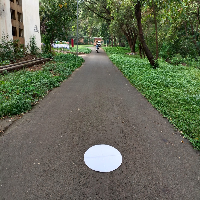

In [2]:
img = cv.imread('/content/4.jpeg')
img = cv.resize(img, (200,200), interpolation= cv.INTER_LINEAR)
result = img.copy()
cv2_imshow(img)

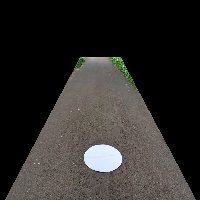

In [3]:
#Lane region of interest
imshape = img.shape
lower_left = [imshape[1] / 40, imshape[0]]
lower_right = [imshape[1] - imshape[1] / 40, imshape[0]]
top_left = [imshape[1] / 2 - imshape[1] / 10, imshape[0] /3.5 ]
top_right = [imshape[1] / 2 + imshape[1] / 10, imshape[0] /3.5 ]
vertices1 = [np.array([lower_left, top_left, top_right, lower_right], dtype=np.int32)]
mask = np.zeros_like(img)
cv.fillPoly(mask,vertices1,(255,255,255))
masked_image = cv.bitwise_and(img,mask)
cv2_imshow(masked_image)

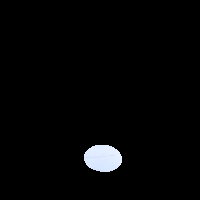

In [4]:
#Mirrors
#hsv = cv.cvtColor(img,cv2.COLOR_BGR2HSV)
#Color ranges 
low_grey = np.array([200,200,200])
high_grey = np.array([255,255,255])
mask = cv.inRange(masked_image,low_grey,high_grey)
result = cv.bitwise_and(img,img,mask = mask)
cv2_imshow(result)

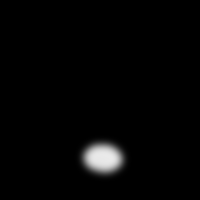

In [5]:
gray_img = cv.cvtColor(result,cv.COLOR_BGR2GRAY)
blur_img = cv.GaussianBlur(gray_img,(21,21),cv.BORDER_DEFAULT)
edged = cv.Canny(gray_img, 300, 700)
#_, threshold = cv.threshold(img, 240, 255, cv.THRESH_BINARY)
contours, hierarchy = cv.findContours(edged, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv2_imshow(blur_img)

In [6]:
co_store = []
font = cv.FONT_HERSHEY_COMPLEX
for cnt in contours:
    approx = cv.approxPolyDP(cnt, 0.001*cv.arcLength(cnt, True), True)
    x = approx.ravel()[0]
    y = approx.ravel()[1]
    if 6< len(approx) :
      x_values = []
      y_values = []
      for i in range(len(approx)):
        x_values.append(approx[i][0][0])
        y_values.append(approx[i][0][1])
      x_center =  statistics.mean(x_values) 
      y_center =  statistics.mean(y_values) 
      if (x_center,y_center) not in co_store:
        co_store.append((x_center,y_center))
        print("Co-ordinates of pothole : " + str(x_center) + "," + str(y_center))

Co-ordinates of pothole : 103,156


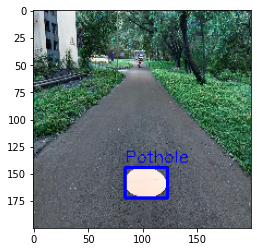

In [7]:
#Bounding Boxes
for pic, contour in enumerate(contours):
        area = cv.contourArea(contour)
        if(area > 150):
            x, y, w, h = cv.boundingRect(contour)
            img = cv.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
            cv.putText(img,"Pothole", (x, y-5),cv.FONT_HERSHEY_SIMPLEX, 0.5,(0, 0, 255))
#cv2_imshow(img)
plt.imshow(img)